## Analisando as notas em geral

In [33]:
import pandas as pd
import seaborn as sns

In [34]:
notas = pd.read_csv('./ml-latest-small/ratings.csv')
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [35]:
notas.shape

(100836, 4)

In [36]:
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]
# DATAFRAME
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [37]:
# SERIES
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [38]:
print("Media", notas['nota'].mean())
print("Mediana", notas['nota'].median())

Media 3.501556983616962
Mediana 3.5


In [39]:
notas.nota.head()

0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: nota, dtype: float64

In [40]:
notas.nota.value_counts()

nota
4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

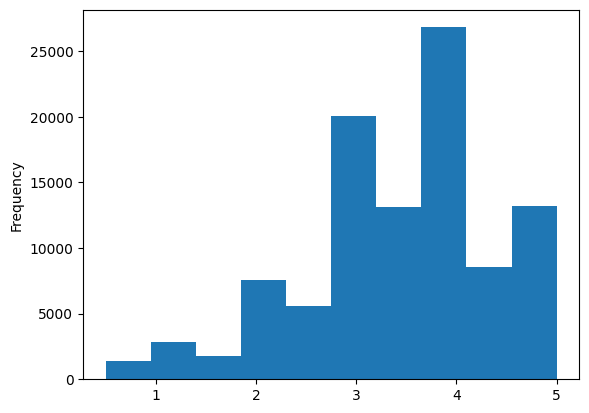

In [41]:
notas.nota.plot(kind='hist')

In [42]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

<Axes: xlabel='nota'>

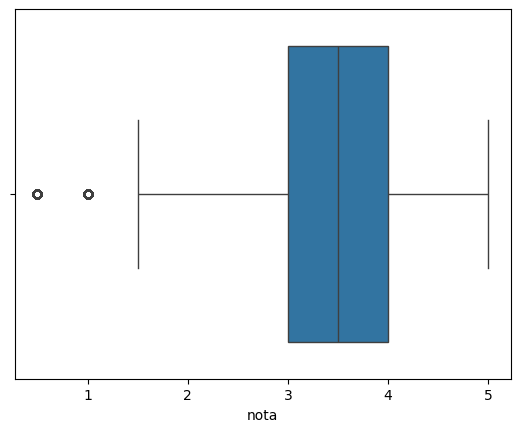

In [43]:
sns.boxplot(x=notas.nota)

A mediana está representada no meio do retângulo azul — ou seja, no 3,5, dividindo, em duas partes, 50% dos dados (entre 3 e 3,5, e entre 3,5 e 4. Outros 25% dos nossos dados estão entre 4 e 5, e o restante está abaixo de 3.

Com todas essas análises, que tipo de informações podemos extrair? Uma delas é que metade dos usuários (uma parcela muito grande!) deu avaliações entre 3 e 4, e que as notas entre 0,5 e 1,5 figuram pouco significativamente nessa amostra.

Exploratory data analysis (EDA) é uma etapa muito importante para entendermos o comportamento dos dados e, a partir disso, conseguirmos extrair informações relevantes.

## Olhando os filmes

In [44]:
filmes = pd.read_csv('./ml-latest-small/movies.csv')
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [45]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Analisando algumas notas especificas por filme

In [46]:
notas.query("filmeId==1").nota.mean()

3.9209302325581397

In [47]:
notas.query("filmeId==2").nota.mean()

3.4318181818181817

In [48]:
medias_por_filmes = notas.groupby("filmeId").mean()["nota"]
medias_por_filmes.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

<Axes: ylabel='Frequency'>

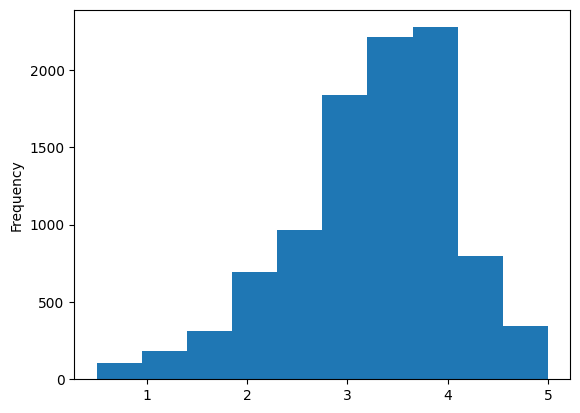

In [49]:
medias_por_filmes.plot(kind='hist')

<Axes: ylabel='nota'>

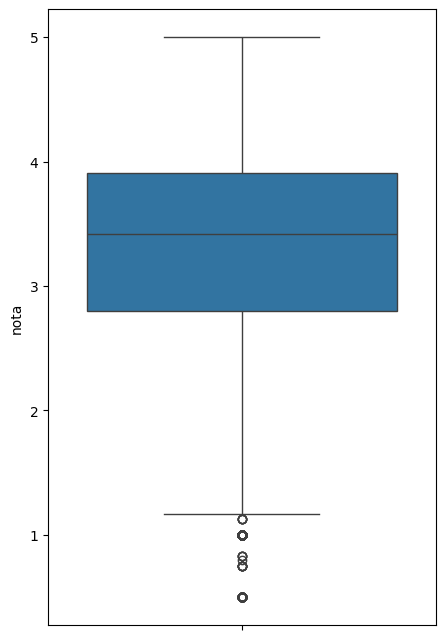

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,8))
sns.boxplot(y=medias_por_filmes)

In [51]:
medias_por_filmes.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

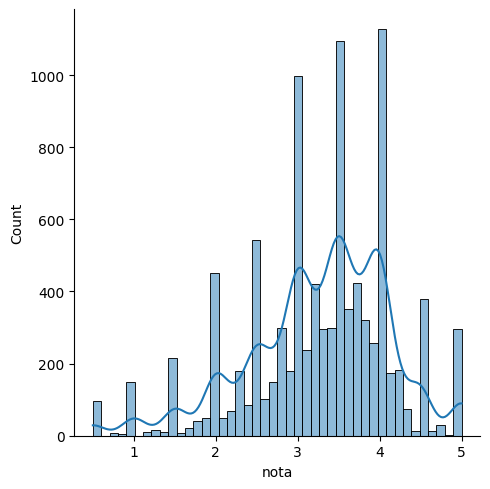

In [52]:
sns.displot(medias_por_filmes, kde=True)

Text(0.5, 1.0, 'Histograma das médias dos filmes')

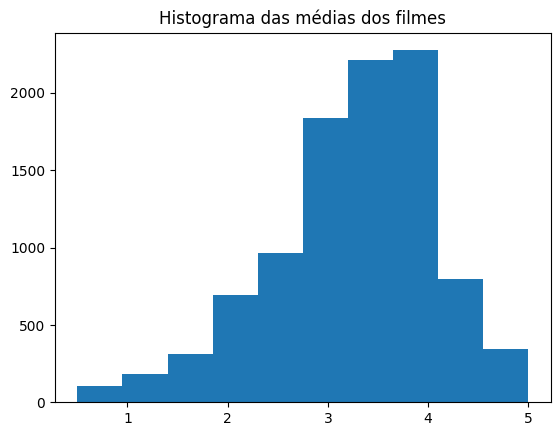

In [53]:
plt.hist(medias_por_filmes)
plt.title("Histograma das médias dos filmes")

In [54]:
tmdb = pd.read_csv("tmdb_5000_movies.csv")
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


# Variáveis

### Variável categórica nominal
- São variáveis que não podem ser ordenadas ou medidas de forma quantitativa.

In [55]:

tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

### Variável Categorica Ordinal
- primeiro grau
- segundo grau
- terceiro grau
- 1 grau < 2 grau < 3 grau

Afinal, o que são variáveis categóricas nominais e ordinais?

As variáveis categóricas são aquelas que não possuem valores quantitativos, mas, ao contrário, são definidas por várias categorias, ou seja, representam uma classificação dos indivíduos. Podem ser nominais ou ordinais.

Quando estamos trabalhando com categorias ordinais, existe uma ordenação entre as categorias. Por exemplo: escolaridade (primeiro, segundo e terceiro graus), estágios de uma doença (inicial, intermediário, terminal), mês de observação (janeiro, fevereiro, ..., dezembro), etc.

Referência

### Variável Quantitativa continuo
- se assumirmos que seja possível discretizar esses valores com casas decimais (com os centavos dos centavos, por exemplo), será contínua.
- budget => orçamento 

### Variável quantitativa intervalar
- quantidade de votos => 1, 2, 3, 4, não tem 2.5 votos
- notas do movielens => 0.5, 1, 1.5, ... ,5 não tem 2.7

# Visualização de dados

In [56]:
tmdb.original_language.value_counts().index

Index(['en', 'fr', 'es', 'zh', 'de', 'hi', 'ja', 'it', 'cn', 'ru', 'ko', 'pt',
       'da', 'sv', 'nl', 'fa', 'th', 'he', 'ta', 'cs', 'ro', 'id', 'ar', 'vi',
       'sl', 'ps', 'no', 'ky', 'hu', 'pl', 'af', 'nb', 'tr', 'is', 'xx', 'te',
       'el'],
      dtype='object', name='original_language')

In [57]:
tmdb.original_language.value_counts().values

array([4505,   70,   32,   27,   27,   19,   16,   14,   12,   11,   11,
          9,    7,    5,    4,    4,    3,    3,    2,    2,    2,    2,
          2,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1])

In [58]:
contagem_de_lingua = tmdb.original_language.value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ["original_language", "total"]
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


<Axes: xlabel='original_language', ylabel='total'>

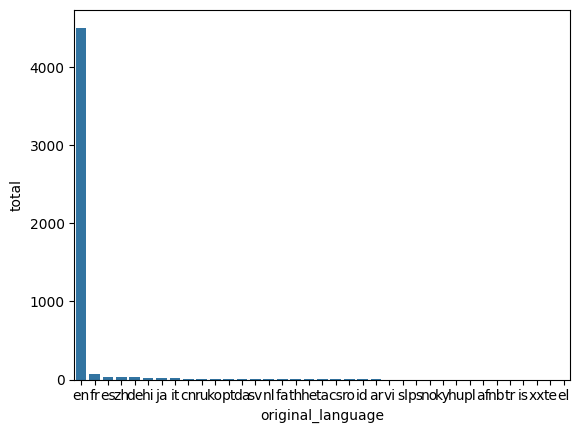

In [59]:
# PLOTS DE CATEGORICAL DATA - COMPARAR CATEGORIAS
sns.barplot(x="original_language", y="total", data = contagem_de_lingua)

<Figure size 500x1000 with 0 Axes>

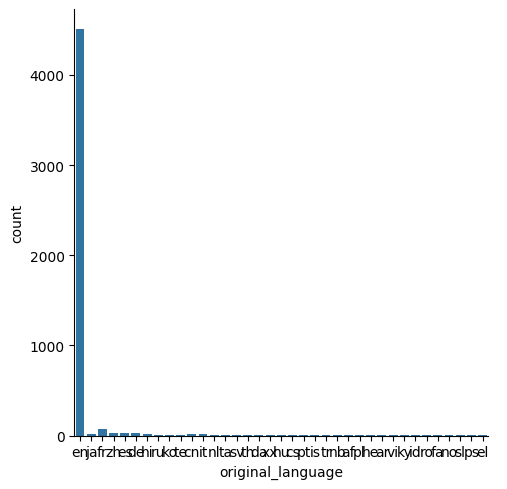

In [61]:
plt.figure(figsize=(5,10))
sns.catplot(x="original_language", kind="count", data = tmdb)

([<matplotlib.patches.Wedge at 0x7f290cc4d4e0>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'zh'),
  Text(1.0773191105706255, -0.22222406260195313, 'de'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ru'),
  Text(1.0960865535188649, -0.09270527058984593, 'ko'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'nl'),
  Text(1.0990363161210686, -0.04603450713357274, 'fa'),
  Text(1.0992355702663055, -0.04100196411527794, 'th'),
  Text

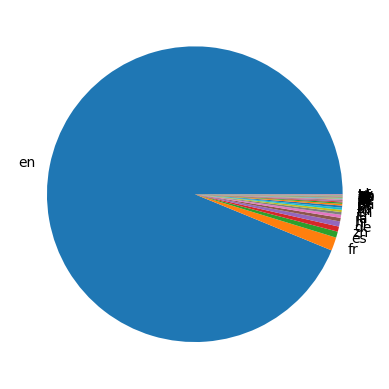

In [62]:
plt.pie(contagem_de_lingua.total, labels = contagem_de_lingua.original_language)

Na realidade, o gráfico de pizza não costuma ser recomendado, afinal, a olho nu, é muito difícil entender as diferenças proporcionais entre as áreas de cada fatia.

Portanto, nenhum dos gráficos que utilizamos até agora nos serviu perfeitamente. Mesmo o de barras, que era mais interessante, continha informações demais, impedindo uma análise compreensiva da mensagem a ser passada.


In [66]:
total_por_lingua = tmdb.original_language.value_counts()
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc['en']
total_do_resto = total_geral - total_de_ingles
print(total_de_ingles, total_do_resto)

4505 298


<Axes: xlabel='lingua', ylabel='total'>

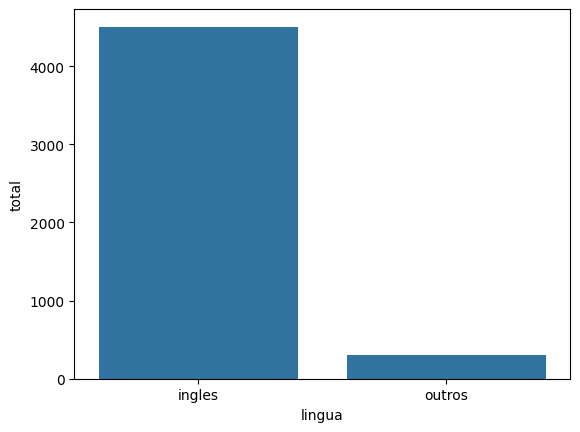

In [71]:
dados = {
    'lingua' : ['ingles', 'outros'],
    'total' : [total_de_ingles, total_do_resto]
}
dados = pd.DataFrame(dados)
sns.barplot(x="lingua", y="total", data = dados)

([<matplotlib.patches.Wedge at 0x7f290fd80e20>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'ingles'),
  Text(1.0791697511565306, -0.2130555049482467, 'outros')])

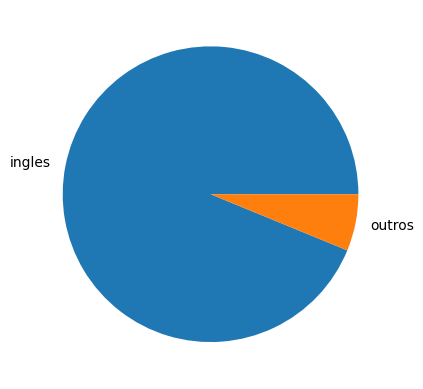

In [72]:
plt.pie(dados.total, labels = dados.lingua)

In [78]:
total_por_lingua_de_outros_filmes = tmdb.query("original_language != 'en'").original_language.value_counts()
total_por_lingua_de_outros_filmes

original_language
fr    70
es    32
zh    27
de    27
hi    19
ja    16
it    14
cn    12
ko    11
ru    11
pt     9
da     7
sv     5
fa     4
nl     4
he     3
th     3
ro     2
id     2
ar     2
cs     2
ta     2
tr     1
nb     1
af     1
pl     1
is     1
hu     1
vi     1
ky     1
xx     1
te     1
no     1
sl     1
ps     1
el     1
Name: count, dtype: int64

/tmp/ipykernel_26432/3284098830.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x="original_language", kind="count", data = filmes_sem_lingua_original_em_ingles, aspect=2, order=total_por_lingua_de_outros_filmes.index, palette="GnBu_d")


<Figure size 500x1000 with 0 Axes>

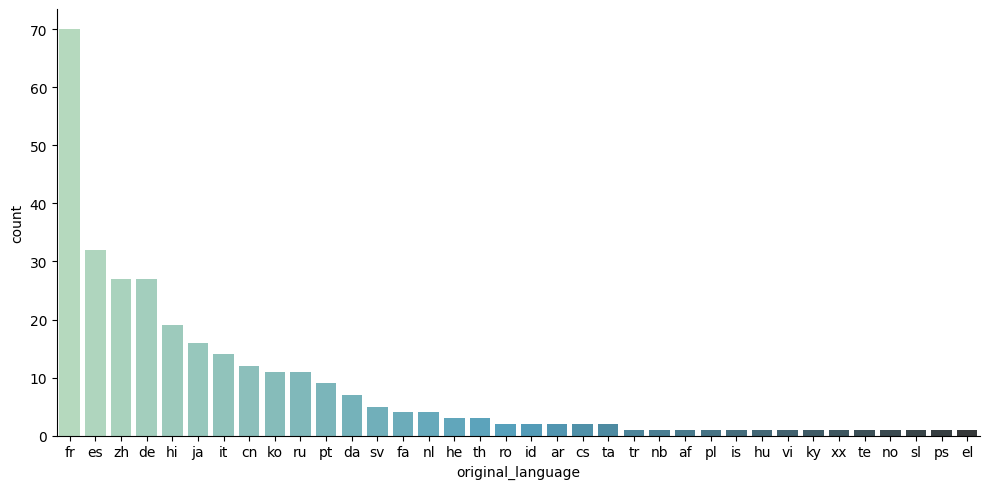

In [81]:
filmes_sem_lingua_original_em_ingles = tmdb.query("original_language != 'en'")
sns.catplot(x="original_language", kind="count",
              data = filmes_sem_lingua_original_em_ingles, aspect=2,
              order=total_por_lingua_de_outros_filmes.index, palette="GnBu_d")

### Revisando o papel da média, mediana, medidas de tendência central, dispersão, desvio padrão, boxplot, histograma, gráficos de barra, gráficos de dispersão, correlação, covariância, entre outros.

In [82]:
filmes.head(2)

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [86]:
notas_do_toy_story = notas.query("filmeId==1")
notas_do_jumanji = notas.query("filmeId==2")
print(len(notas_do_toy_story), len(notas_do_jumanji))

215 110


In [88]:
print("Nota média do Toy Story %.2f" % notas_do_toy_story.nota.mean())
print("Nota média do Jumanji %.2f" % notas_do_jumanji.nota.mean())

Nota média do Toy Story 3.92
Nota média do Jumanji 3.43


In [89]:
print("Nota mediana do Toy Story %.2f" % notas_do_toy_story.nota.median())
print("Nota mediana do Jumanji %.2f" % notas_do_jumanji.nota.median())

Nota média do Toy Story 4.00
Nota média do Jumanji 3.50


In [92]:
import numpy as np

filmes1 = np.append(np.array([2.5] * 10), np.array([3.5] * 10))
filmes2 = np.append(np.array([5] * 10), np.array([1] * 10))

In [109]:
print(filmes1.mean(), filmes2.mean())
print(np.std(filmes1), np.std(filmes2))
print(np.median(filmes1), np.median(filmes2))

3.0 3.0
0.5 2.0
3.0 3.0


Repare que as notas do primeiro filme são muito próximas entre si. Já no segundo, o conjunto de notas está bem mais disperso. Ainda assim, as duas médias são exatamente iguais.

a media e mediana são medidas de tendência central, ou seja, são medidas que tentam representar o centro dos dados. A média é a soma de todos os valores dividido pelo número de observações. A mediana é o valor que separa a metade maior da metade menor de um conjunto de dados. Quando temos muitos dados dispersos perdemos a capacidade de analisar.

(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

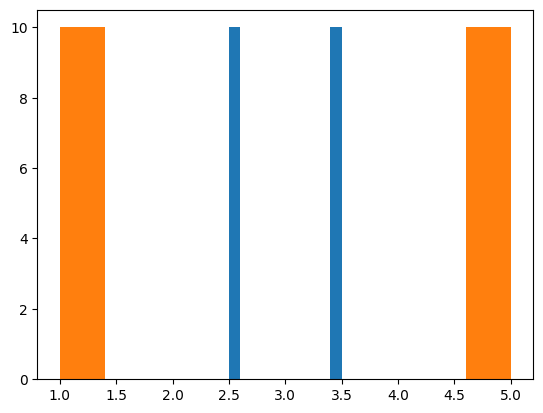

In [99]:
plt.hist(filmes1)
plt.hist(filmes2)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f290b8b9870>,
 'caps': [<matplotlib.lines.Line2D at 0x7f290b8b9db0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f290b8b96f0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f290b8ba2f0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f290b8ba590>,
 'means': []}

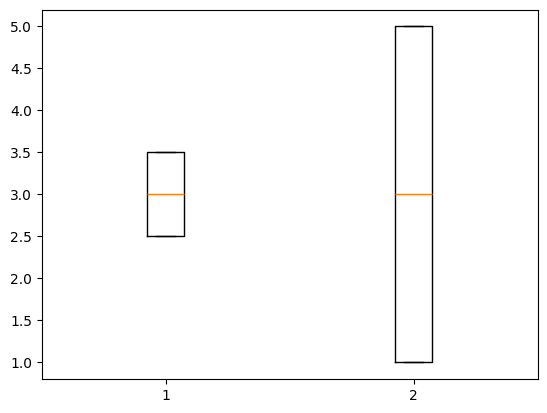

In [101]:
plt.boxplot([filmes1, filmes2])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f290b622590>,
 'caps': [<matplotlib.lines.Line2D at 0x7f290b6229b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f290b6222f0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f290b622ef0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f290b623190>,
 'means': []}

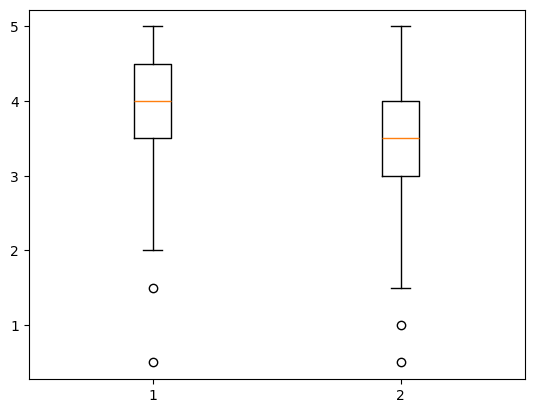

In [104]:
plt.boxplot([notas_do_toy_story.nota, notas_do_jumanji.nota])

<Axes: xlabel='filmeId', ylabel='nota'>

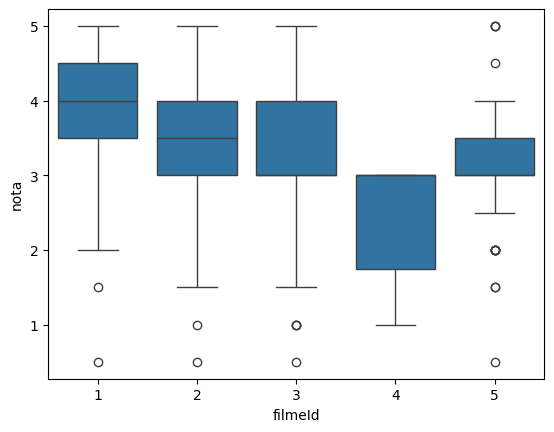

In [106]:
sns.boxplot(x="filmeId", y="nota", data = notas.query("filmeId in [1,2, 3, 4, 5]"))

In [107]:
notas_do_jumanji.nota.std(), notas_do_toy_story.nota.std()

(0.8817134921476455, 0.8348591407114047)